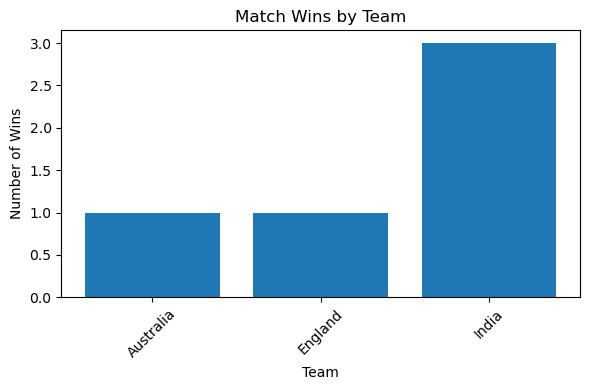

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Predicted Winner: India


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt             # Used for graph display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Dataset Lists
data = pd.DataFrame({
    'T1': ['India', 'Australia', 'England', 'India', 'Pakistan'],
    'T2': ['Pakistan', 'India', 'Pakistan', 'Australia', 'India'],
    'Place': ['Mumbai', 'Sydney', 'London', 'Delhi', 'Lahore'],
    'win_toss': ['India', 'India', 'England', 'India', 'Pakistan'],
    'toss_decision': ['bat', 'field', 'bat', 'bat', 'field'],
    'winner': ['India', 'India', 'England', 'Australia', 'India']
})

# Converting to categorical and store mappings : 
categorical_columns = ['T1', 'T2', 'Place', 'win_toss', 'toss_decision', 'winner']
mappings = {}
for col in categorical_columns:
    data[col] = data[col].astype('category')
    mappings[col] = dict(enumerate(data[col].cat.categories))
    data[col] = data[col].cat.codes

# GRAPH: Match Winner Count
plt.figure(figsize=(6, 4))
winner_names = [mappings['winner'][i] for i in sorted(data['winner'].unique())]
winner_counts = data['winner'].value_counts().sort_index()
plt.bar(winner_names, winner_counts)
plt.title("Match Wins by Team")    # Title of graph
plt.xlabel("Team")                #  labeling axis
plt.ylabel("Number of Wins")      #  labeling axis
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()                        # To display

# Features of graph
X = data[['T1', 'T2', 'Place', 'win_toss', 'toss_decision']]
y = data['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediction concept 
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Predict new match
reverse_map = {v: k for k, v in mappings['T1'].items()}
sample = pd.DataFrame([{
    'T1': reverse_map['India'],
    'T2': reverse_map['Pakistan'],
    'Place': {v: k for k, v in mappings['Place'].items()}['Delhi'],
    'win_toss': reverse_map['India'],
    'toss_decision': {v: k for k, v in mappings['toss_decision'].items()}['bat']
}])

pred_code = model.predict(sample)[0]
print("Predicted Winner:", mappings['winner'][pred_code])
